# MACHINE LEARNING EXAM PAPER - I
Submitted by: Pushkar Khedkar

Given Dataset : Portugal Bank Marketing



### Attributes information:

1) age (numeric) 

2) job: type of job(categorical:"admin.","bluecollar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown") 

3) marital: marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed) 

4) education: education of individual (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown") 

5) default: has credit in default? (categorical: "no","yes","unknown") 

6) housing: has housing loan? (categorical: "no","yes","unknown") 

7) loan: has personal loan? (categorical: "no","yes","unknown")

### Attributes Related with the last contact of the current campaign: 

8) contact: contact communication type (categorical: "cellular","telephone") 

9) month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec") 

10) dayofweek: last contact day of the week (categorical: "mon","tue","wed","thu","fri") 

11) duration: last contact duration, in seconds (numeric). 

Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### Other attributes: 

12) campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) 

13) pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted) 

14) previous: number of contacts performed before this campaign and for this client (numeric) 

15) poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

### Social and economic context attributes:

16) emp.var.rate: employment variation rate - quarterly indicator (numeric) 

17) cons.price.idx: consumer price index - monthly indicator (numeric) 

18) cons.conf.idx: consumer confidence index - monthly indicator (numeric) 

19) concavepoints_se: standard error for number of concave portions of the contour 

20) euribor3m: euribor 3 month rate - daily indicator (numeric) 

21) nr.employed: number of employees - quarterly indicator (numeric) 

22) Output variable (desired target): 22) y: has the client subscribed a term deposit? (binary: "yes","no")

=================================================================================================


## OBJECTIVES:

Q1. What does the primary analysis of several categorical features reveal?

<br>
Q2. Perform the following Exploratory Data Analysis tasks:

a. Missing Value Analysis

b. Label Encoding wherever required

c. Selecting important features based on Random Forest

d. Standardize the data using the anyone of the scalers provided by sklearn




<br>
Q3. Build the following Supervised Learning models:

a. Logistic Regression

b. AdaBoost

c. KNN

d. SVM



<br>
Q4.Tabulate the performance metrics of all the above models and tell which model performs better in predicting if the client will subscribe to term deposit or not

In [1]:
#importing essential liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import precision_score, recall_score, fbeta_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
#reading provided file
df = pd.read_csv("bank.csv", delimiter=";")

In [3]:
print("dataset has {} datapoints and {} features.".format(df.shape[0], df.shape[1]))

dataset has 41188 datapoints and 21 features.


# 1] Primary analysis of categorical features:

In [4]:
df.info()     #checking dtypes of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df_cat = df.select_dtypes(include="object")    #getting all categorical columns from dataframe

In [6]:
df_cat.shape 

(41188, 11)

In [7]:
df_cat.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [8]:
for i in df_cat.columns:
    print(i,": ", df[i].value_counts())
    print("*"*100)                               #printing value-counts of all columns

job :  admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
****************************************************************************************************
marital :  married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
****************************************************************************************************
education :  university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
****************************************************************************************************
defa

In [9]:
def cl_di(x):                      #cl_di: class-distribution
    cl_di = pd.DataFrame()
    cl_di['no'] = df_cat[df_cat['y'] == 'no'][x].value_counts()
    cl_di['yes'] = df_cat[df_cat['y'] == 'yes'][x].value_counts()
    cl_di.plot(kind='bar')
    plt.xlabel('{}'.format(x))
    plt.ylabel('Number of clients')
    plt.title('Distribution of {} and deposit'.format(x))
    plt.show()

<Figure size 1080x3600 with 0 Axes>

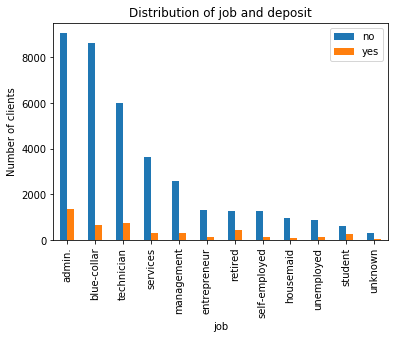

<Figure size 1080x3600 with 0 Axes>

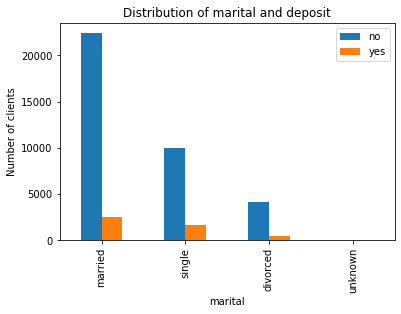

<Figure size 1080x3600 with 0 Axes>

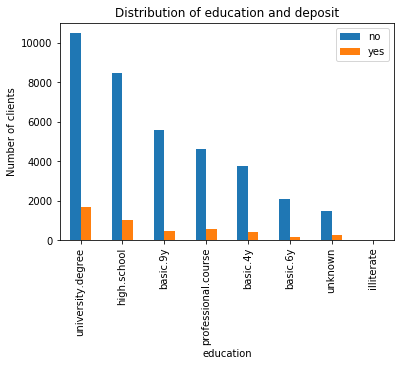

<Figure size 1080x3600 with 0 Axes>

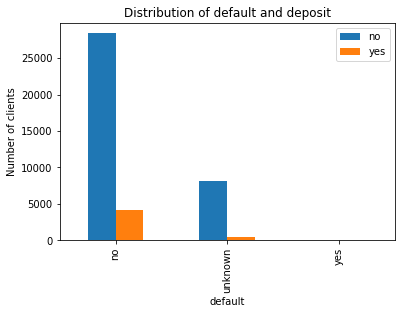

<Figure size 1080x3600 with 0 Axes>

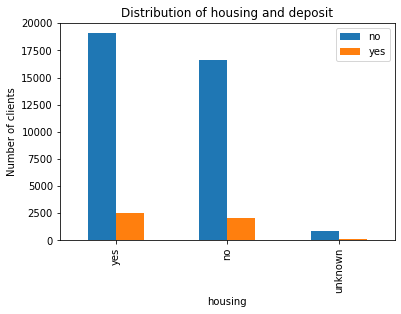

<Figure size 1080x3600 with 0 Axes>

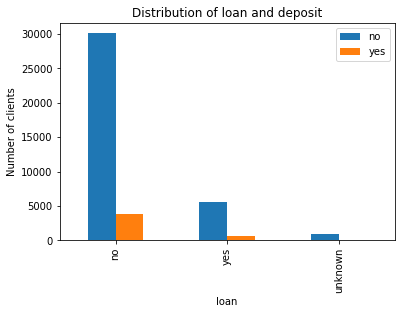

<Figure size 1080x3600 with 0 Axes>

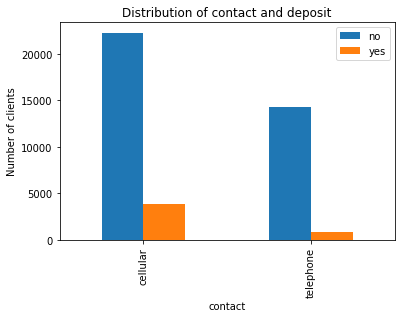

<Figure size 1080x3600 with 0 Axes>

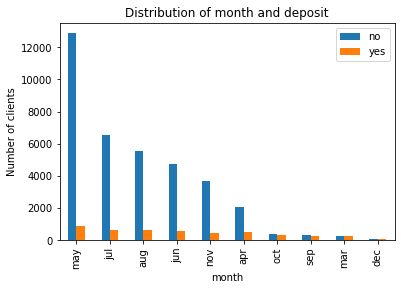

<Figure size 1080x3600 with 0 Axes>

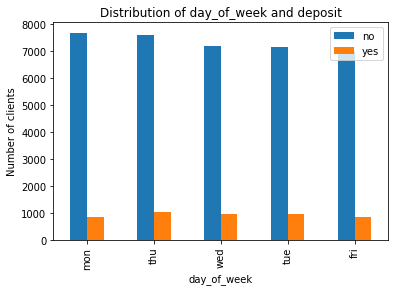

<Figure size 1080x3600 with 0 Axes>

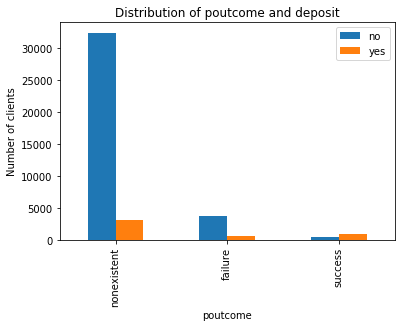

In [10]:
for i,j in zip(range(1,df_cat.shape[1]),df_cat.columns):
    plt.figure(figsize=(15,50))
    cl_di(j)

# 2] Exploratory Data Analysis tasks:

## 2 a. Missing Value Analysis


In [12]:
df.isnull().sum()    #checking if dataset contains any null values or not

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<br>
Dataset has no null values.

## 2 b. Label encoding :
we already have categorical columns dataframe from earlier. (df_cat)

In [13]:
df_dummies = pd.get_dummies(df_cat.drop(columns="y"), drop_first=True , prefix = df_cat.columns[:-1] )

In [14]:
df = df.drop(columns = df_cat.columns)

In [15]:
df= pd.concat([df,df_dummies], axis = 1)

In [16]:
df["y"] = df_cat["y"]

In [17]:
df["y"].replace("no",0,inplace=True)
df["y"].replace("yes",1,inplace=True)

## 2 c. Selecting important features based on Random Forest:

### Starting with checking class imbalance:

In [18]:
df["y"].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [19]:
df["y"].value_counts()*100/df.shape[0]   #checking class imbalance in percentage

0    88.734583
1    11.265417
Name: y, dtype: float64

<br>
There is a major class imbalance. to take care of imbalance, we will use SMOTE.

In [20]:
X = df.drop(columns = "y")
y = df["y"]

In [21]:
sm = SMOTE(random_state=56)
X, y = sm.fit_sample(X, y)

In [22]:
y.value_counts()      #imbalance is removed

1    36548
0    36548
Name: y, dtype: int64

In [23]:
#train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 2)

30% of data has been taken for testing.

### Cross validation using random forest algorithm:

In [24]:
cv_scores=[]
for i in np.arange(11,23):
    #random forest algorithm
    RF = RandomForestClassifier(max_depth=i)
    scores = cross_val_score(RF , x_train, y_train , cv = 10, scoring = "f1")
    cv_scores.append(scores.mean())

In [25]:
for i,j in zip(cv_scores,np.arange(11,23)):
    print("Cross validation score for depth {} is {}".format(j,i))

Cross validation score for depth 11 is 0.9387623776148757
Cross validation score for depth 12 is 0.9402712092742679
Cross validation score for depth 13 is 0.9431382285094925
Cross validation score for depth 14 is 0.9453106458790093
Cross validation score for depth 15 is 0.946607818549414
Cross validation score for depth 16 is 0.9477101361961076
Cross validation score for depth 17 is 0.9489833749271931
Cross validation score for depth 18 is 0.9492597607628352
Cross validation score for depth 19 is 0.949526345131629
Cross validation score for depth 20 is 0.9502150354468766
Cross validation score for depth 21 is 0.9509034778140272
Cross validation score for depth 22 is 0.9505440308986375


In [26]:
RF = RandomForestClassifier(max_depth = 22)
RF.fit(x_train,y_train)

RandomForestClassifier(max_depth=22)

In [27]:
fi = RF.feature_importances_

In [28]:
feature_importance = pd.DataFrame(fi, columns = ["Importances"])

In [29]:
feature_importance["columns"] = X.columns

In [30]:
feature_importance.sort_values(by= "Importances", ascending=False, inplace=True)

In [31]:
feature_importance.reset_index(inplace=True,drop=True)

In [32]:
feature_importance= feature_importance[["columns","Importances"]]

In [65]:
print("Feature importance table:")
print("Most important features first: ")
feature_importance 

Feature importance table:
Most important features first: 


,columns,Importances
0,duration,0.300076
1,nr.employed,0.083103
2,euribor3m,0.082741
3,emp.var.rate,0.052056
4,cons.conf.idx,0.046689
5,cons.price.idx,0.038197
6,age,0.028934
7,default_unknown,0.024815
8,contact_telephone,0.024498
9,month_may,0.024308


## 2 d. Standardize the data using the anyone of the scalers provided by sklearn

In [34]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# 3] Building the following Supervised Learning models:

In [35]:
f1_scores_list=[]
precision_scores_list=[]
recall_scores_list=[]

## 3 a. Logistic Regression

In [36]:
c = [0.001,0.01,0.1,1]
cv_scores=[]
for i in c:
    #logistic regression
    LR = LogisticRegression(C =i, n_jobs=-1)
    scores = cross_val_score(LR , x_train, y_train , cv = 10, scoring = "f1")
    cv_scores.append(scores.mean())

In [37]:
for i,j in zip(cv_scores,c):
    print("Cross validation score for C = {} is {}".format(j,i))

Cross validation score for C = 0.001 is 0.9323886977079161
Cross validation score for C = 0.01 is 0.9344015654832131
Cross validation score for C = 0.1 is 0.9351708843631164
Cross validation score for C = 1 is 0.9355026180998973


In [38]:
# Best value of C is 1.
LR = LogisticRegression(C=1, n_jobs=-1)
LR.fit(x_train,y_train)

LogisticRegression(C=1, n_jobs=-1)

In [39]:
y_pred_train = LR.predict(x_train)
y_pred_test = LR.predict(x_test)      

In [40]:
print("TRAINING SCORES:")
print("Precision using logistic regression ",precision_score(y_train,y_pred_train))
print("Recall using logistic regression ",recall_score(y_train,y_pred_train))
print("f1 score using logistic regression ",fbeta_score(y_train,y_pred_train,beta=1))
print("*"*100)
print("TESTING SCORES:")
print("Precision using logistic regression ",precision_score(y_test,y_pred_test))
print("Recall using logistic regression ",recall_score(y_test,y_pred_test))
print("f1 score using logistic regression ",fbeta_score(y_test,y_pred_test,beta=1))
print("*"*100)
f1_scores_list.append(fbeta_score(y_test,y_pred_test,beta=1))
precision_scores_list.append(precision_score(y_test,y_pred_test))
recall_scores_list.append(recall_score(y_test,y_pred_test))

TRAINING SCORES:
Precision using logistic regression  0.942052456944225
Recall using logistic regression  0.9297855750487329
f1 score using logistic regression  0.935878821174901
****************************************************************************************************
TESTING SCORES:
Precision using logistic regression  0.9393657583930066
Recall using logistic regression  0.9268673151036888
f1 score using logistic regression  0.933074684772066
****************************************************************************************************


## 3 b. AdaboostClassifier

In [41]:
lr = [0.001,0.01,0.1,1]
cv_scores=[]
for i in lr:
    #Adaboostclassifier
    ADB = AdaBoostClassifier(learning_rate =i, random_state=8)
    scores = cross_val_score(ADB , x_train, y_train , cv = 10, scoring = "f1")
    cv_scores.append(scores.mean())

In [42]:
for i,j in zip(cv_scores,lr):
    print("Cross validation score for learning_rate = {} is {}".format(j,i))

Cross validation score for learning_rate = 0.001 is 0.7387601171084058
Cross validation score for learning_rate = 0.01 is 0.8498180317596349
Cross validation score for learning_rate = 0.1 is 0.8850646494452995
Cross validation score for learning_rate = 1 is 0.9325466324412062


In [43]:
# Best value of learning_rate is 1.
ADB = AdaBoostClassifier(learning_rate =1, random_state=7)
ADB.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=1, random_state=7)

In [44]:
y_pred_train = ADB.predict(x_train)
y_pred_test = ADB.predict(x_test) 

In [45]:
print("TRAINING SCORES:")
print("Precision using Adaboost ",precision_score(y_train,y_pred_train))
print("Recall using Adaboost ",recall_score(y_train,y_pred_train))
print("f1 score using Adaboost ",fbeta_score(y_train,y_pred_train,beta=1))
print("*"*100)
print("TESTING SCORES:")
print("Precision using Adaboost ",precision_score(y_test,y_pred_test))
print("Recall using Adaboost ",recall_score(y_test,y_pred_test))
print("f1 score using Adaboost ",fbeta_score(y_test,y_pred_test,beta=1))
print("*"*100)
f1_scores_list.append(fbeta_score(y_test,y_pred_test,beta=1))
precision_scores_list.append(precision_score(y_test,y_pred_test))
recall_scores_list.append(recall_score(y_test,y_pred_test))

TRAINING SCORES:
Precision using Adaboost  0.9324661162174793
Recall using Adaboost  0.933411306042885
f1 score using Adaboost  0.9329384717297277
****************************************************************************************************
TESTING SCORES:
Precision using Adaboost  0.9314096063427676
Recall using Adaboost  0.9270508350155992
f1 score using Adaboost  0.9292251092205105
****************************************************************************************************


## 3 c. KNN

In [46]:
k=[i for i in range(7,10)]
cv_scores=[]
for i in k:
    #KNNclassifier
    KNN = KNeighborsClassifier(n_neighbors =i,metric="euclidean")
    scores = cross_val_score(KNN , x_train, y_train , cv = 10, scoring = "f1")
    cv_scores.append(scores.mean())

In [47]:
for i,j in zip(cv_scores,k):
    print("Cross validation score for neighbors = {} is {}".format(j,i))

Cross validation score for neighbors = 7 is 0.9250145178968043
Cross validation score for neighbors = 8 is 0.9240237511820231
Cross validation score for neighbors = 9 is 0.9232751602866663


In [48]:
#best value for k is 7.
KNN = KNeighborsClassifier(n_neighbors = 7,metric="euclidean")
KNN.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [49]:
y_pred_train = KNN.predict(x_train)
y_pred_test = KNN.predict(x_test) 

In [50]:
print("TRAINING SCORES:")
print("Precision using KNN ",precision_score(y_train,y_pred_train))
print("Recall using KNN ",recall_score(y_train,y_pred_train))
print("f1 score using KNN ",fbeta_score(y_train,y_pred_train,beta=1))
print("*"*100)
print("TESTING SCORES:")
print("Precision using KNN ",precision_score(y_test,y_pred_test))
print("Recall using KNN ",recall_score(y_test,y_pred_test))
print("f1 score using KNN ",fbeta_score(y_test,y_pred_test,beta=1))
print("*"*100)
f1_scores_list.append(fbeta_score(y_test,y_pred_test,beta=1))
precision_scores_list.append(precision_score(y_test,y_pred_test))
recall_scores_list.append(recall_score(y_test,y_pred_test))

TRAINING SCORES:
Precision using KNN  0.9477368546655
Recall using KNN  0.9289668615984406
f1 score using KNN  0.9382579933847849
****************************************************************************************************
TESTING SCORES:
Precision using KNN  0.9300046663555763
Recall using KNN  0.9143879610937786
f1 score using KNN  0.9221301994170176
****************************************************************************************************


## 3 d. Support vector classifier

In [54]:
c=[0.01,0.1,1]
cv_scores=[]
for i in c:
    #SVclassifier
    svc = SVC(C =i)
    scores = cross_val_score(svc , x_train, y_train , cv = 4, scoring = "f1")
    cv_scores.append(scores.mean())

In [55]:
for i,j in zip(cv_scores,c):
    print("Cross validation score for C = {} is {}".format(j,i))

Cross validation score for C = 0.01 is 0.9181281907194789
Cross validation score for C = 0.1 is 0.932956362761526
Cross validation score for C = 1 is 0.9402242475919906


In [56]:
# best value for C is 1.
svc = SVC(C=1)
svc.fit(x_train,y_train)

SVC(C=1)

In [57]:
y_pred_train = svc.predict(x_train)
y_pred_test = svc.predict(x_test)

In [58]:
print("TRAINING SCORES:")
print("Precision using SVC ",precision_score(y_train,y_pred_train))
print("Recall using SVC ",recall_score(y_train,y_pred_train))
print("f1 score using SVC ",fbeta_score(y_train,y_pred_train,beta=1))
print("*"*100)
print("TESTING SCORES:")
print("Precision using SVC ",precision_score(y_test,y_pred_test))
print("Recall using SVC ",recall_score(y_test,y_pred_test))
print("f1 score using SVC ",fbeta_score(y_test,y_pred_test,beta=1))
print("*"*100)
f1_scores_list.append(fbeta_score(y_test,y_pred_test,beta=1))
precision_scores_list.append(precision_score(y_test,y_pred_test))
recall_scores_list.append(recall_score(y_test,y_pred_test))

TRAINING SCORES:
Precision using SVC  0.9637012086387953
Recall using SVC  0.9481091617933723
f1 score using SVC  0.9558416036159969
****************************************************************************************************
TESTING SCORES:
Precision using SVC  0.9506021829130599
Recall using SVC  0.9270508350155992
f1 score using SVC  0.9386788070240639
****************************************************************************************************


# 4] TABULATED RESULTS

In [59]:
Model_names = ["Logistic","AdaBoost","KNN","SVC"]

In [62]:
RESULTS = pd.DataFrame({"Model":Model_names,
                       "F1_scores":f1_scores_list,
                       "Precision":precision_scores_list,
                       "Recall":recall_scores_list})

In [63]:
RESULTS

,Model,F1_scores,Precision,Recall
0,Logistic,0.933075,0.939366,0.926867
1,AdaBoost,0.929225,0.931410,0.927051
2,KNN,0.922130,0.930005,0.914388
3,SVC,0.938679,0.950602,0.927051
